### RGBA画像の読み込み
- OpenCVでRGBA画像を読み込む場合，```cv2.imread(画像ファイル名, -1)```と書く
- **BGRAの順番で読み込む**ため，```cv2.COLOR_BGRA2RGBA```で**RGBAの順番に変換して**表示する
- サンプル画像（rgba-sample.png）

<img src="fig/rgba-sample.png" width="33%">

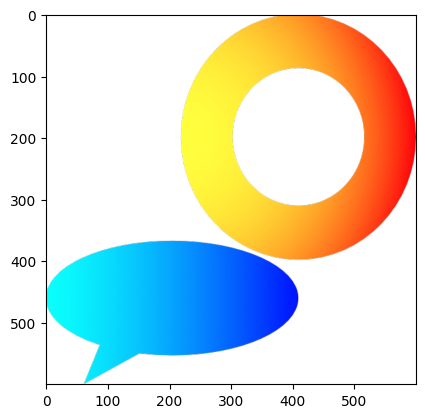

In [132]:
import cv2
import matplotlib.pyplot as plt

# RGBA画像の読み込み
image = cv2.imread('rgba-sample.png', -1)
# BGRA → RGBA
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
# 画像の表示
plt.imshow(image)
plt.show()

### RGBA色空間
- OpenCVでは，RGBAでデータを扱う場合，以下の方法でRGBAの各値を取得できる
    - 赤画素値: ```RGBA画像変数[:,:,0]```
    - 緑画素値: ```RGBA画像変数[:,:,1]```
    - 青画素値: ```RGBA画像変数[:,:,2]```
    - 透過度: ```RGBA画像変数[:,:,3]```
        - **透過度は0から255の値で扱うため，0が透明，255が不透明になる**
        - グレースケールで表示すると，255（白の箇所: 不透明箇所）が0（黒の箇所: 透明箇所）となる
            - 白に近い灰色は透過度が高く不透明，黒に近い灰色は透過度が低く透明になる

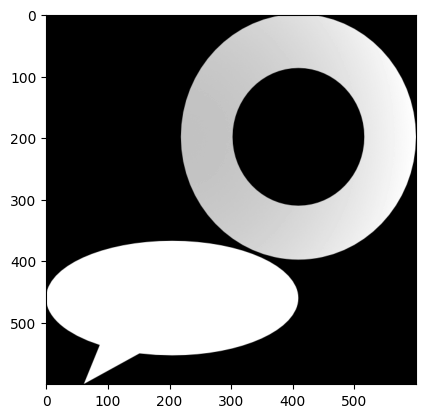

In [133]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('rgba-sample.png', -1) # 透過付き画像の読み込み
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA) # BGRA → RGBA

# 透過度を抜き出す
alpha = image[:,:,3]

plt.imshow(alpha)
plt.gray()
plt.show()

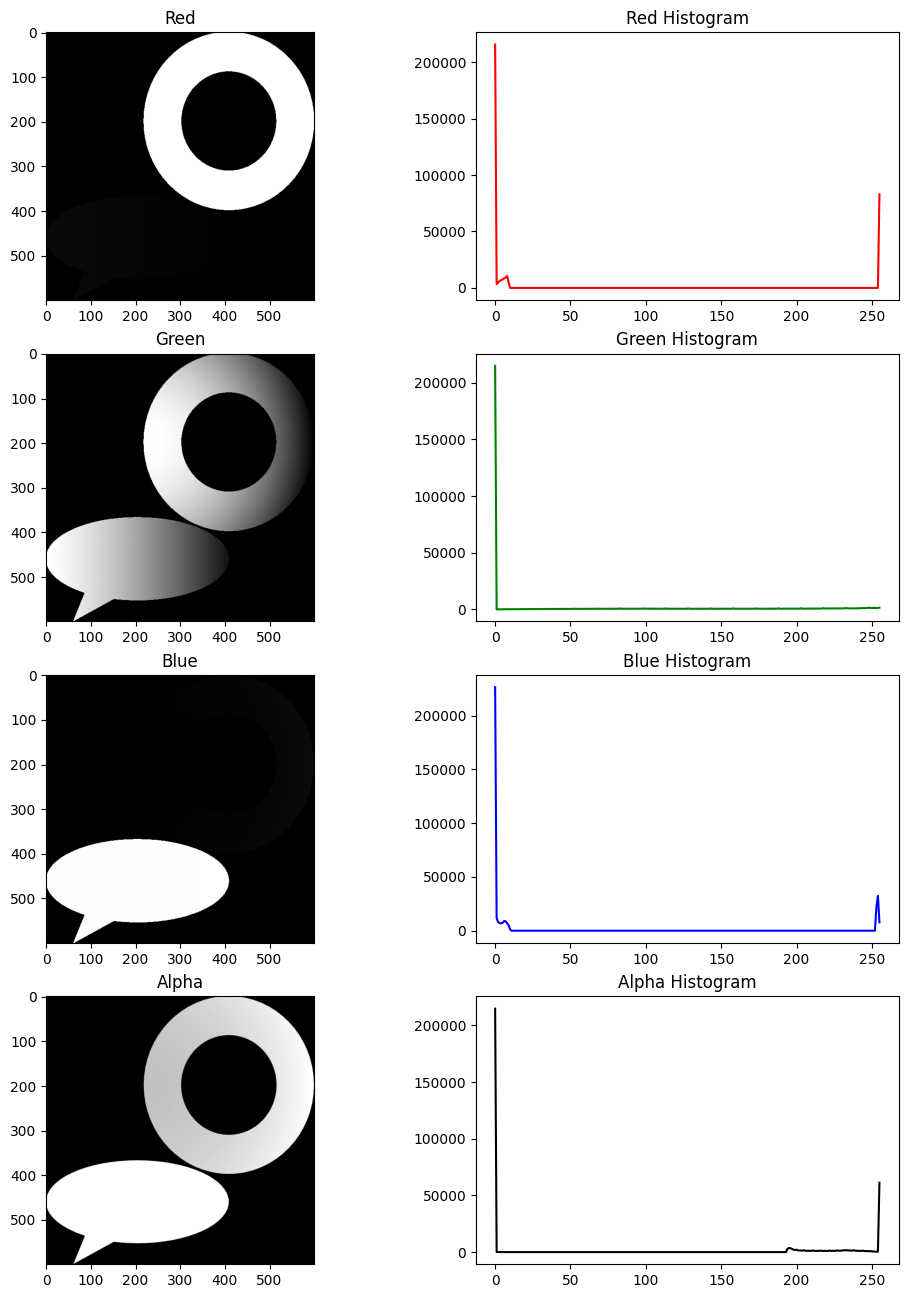

In [134]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('rgba-sample.png', -1) # 透過付き画像の読み込み
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA) # BGRA → RGBA

# RGBA形式なので
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
alpha = image[:,:,3]

plt.figure(figsize=(12, 16)) # 横10インチ，縦8インチ
plt.subplot(421)
plt.title('Red')
plt.imshow(red)

plt.subplot(422)
red_hist = cv2.calcHist([red], [0], None, [256], [0,256])
plt.title('Red Histogram')
plt.plot(red_hist, color='r')

plt.subplot(423)
plt.title('Green')
plt.imshow(green)

plt.subplot(424)
green_hist = cv2.calcHist([green], [0], None, [256], [0,256])
plt.title('Green Histogram')
plt.plot(green_hist, color='g')

plt.subplot(425)
plt.title('Blue')
plt.imshow(blue)

plt.subplot(426)
blue_hist = cv2.calcHist([blue], [0], None, [256], [0,256])
plt.title('Blue Histogram')
plt.plot(blue_hist, color='b')

plt.subplot(427)
plt.title('Alpha')
plt.gray()
plt.imshow(alpha)

plt.subplot(428)
alpha_hist = cv2.calcHist([alpha], [0], None, [256], [0,256])
plt.title('Alpha Histogram')
plt.plot(alpha_hist, color='k')

plt.show()

### 2画像の組み合わせ
- 組み合わせたい2つの画像を用意する
- **ただし，画像のサイズを合わせる必要がある**

#### 使用画像
- 画像ファイル1（12-13-1.png）

<img src="fig/12-13-1.png" width="50%">

- 画像ファイル2（12-13-2.png）

<img src="fig/12-13-2.png" width="50%">

#### 画像サイズの確認
- 画像サイズを確認する場合，```print(画像ファイル変数.shape)```を使用する
- ```画像ファイル変数1.shape == 画像ファイル変数2.shape```と実行し，```True```が表示した場合，同じ大きさの画像であることがわかる
- ```==```は等しい という意味で使用される
    - ```True```が表示された場合: 『左辺と右辺は等しい』という意味になる
    - ```False```が表示された場合: 『左辺と右辺は等しくない』という意味になる

In [135]:
import cv2
image1 = cv2.imread('12-13-1.png', -1)
image2 = cv2.imread('12-13-2.png', -1)
image3 = cv2.imread('boston.jpeg')

print(image1.shape)
print(image2.shape)
print(image3.shape)

print(image1.shape == image2.shape)
print(image1.shape == image3.shape)
print(image2.shape == image3.shape)

(600, 800, 4)
(600, 800, 4)
(384, 576, 3)
True
False
False


### 画素値の組み合わせ
- 2つの画素をただ組み合わせる場合，以下のプログラムで実装できる
```python
組み合わせた画像変数 = 画像1変数 + 画像変数2
```

True


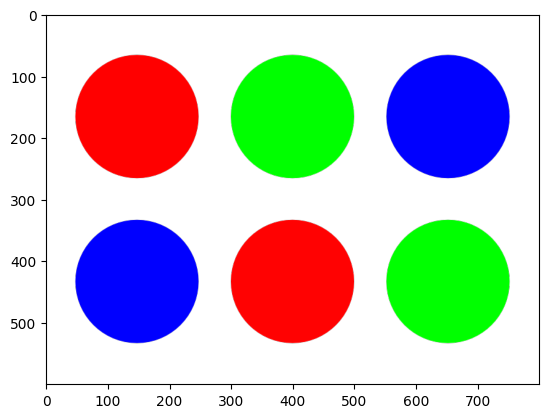

In [136]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-1.png', -1)
image2 = cv2.imread('12-13-2.png', -1)

# サイズチェック
print(image1.shape == image2.shape)

# BGRA → RGBA
image1 = cv2.cvtColor(image1, cv2.COLOR_BGRA2RGBA)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGRA2RGBA)

# 画素値の足し合わせ
blend_image = image1 + image2

plt.imshow(blend_image)
plt.show()

### 平均値画像の実装
- 2つの画素の平均値の画素を求める場合，以下のプログラムで実装できる
```python
組み合わせた画像変数 = (画像1変数 + 画像変数2) // 2
```

True


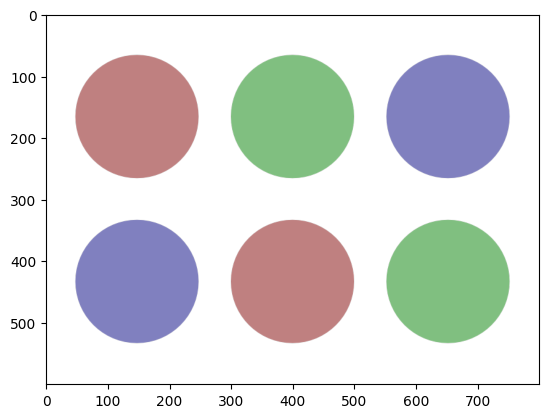

In [137]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-1.png', -1)
image2 = cv2.imread('12-13-2.png', -1)

# サイズチェック
print(image1.shape == image2.shape)

# BGRA → RGBA
image1 = cv2.cvtColor(image1, cv2.COLOR_BGRA2RGBA)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGRA2RGBA)

# 平均値画素を求める
blend = (image1 + image2) // 2

plt.imshow(blend)
plt.show()

### アルファブレンディングの実装
#### 使用画像（https://www.beiz.jp/ からフリー画像を拝借）
- 画像ファイル1（12-13-3.jpg）

<img src="fig/12-13-3.jpg" width="50%">

- 画像ファイル2（12-13-4.jpg）

<img src="fig/12-13-4.jpg" width="50%">
<br><br>
- 数式
    -  ```出力画像画素値 = α × 入力画像1画素値 + β × 入力画像2画素値 + γ```で計算する
- プログラム
    - ```cv2.addWeighted```を使用する
    - 使用例
        - ```アルファブレンディング画像 = cv2.addWeighted(画像1変数, αの値, 画像2変数, βの値, γの値)```
        - ```βの値を1-α```，```γの値を0```にすれば，アルファブレンディングになる．
```python
# サンプルプログラム例
alpha = ○○ # αの値
アルファブレンディング画像 = cv2.addWeighted(画像1変数, alpha, 画像2変数, 1 - alpha, 0)
```


True


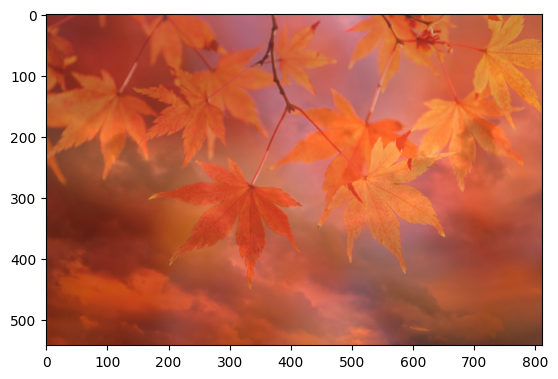

In [138]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-3.jpg')
image2 = cv2.imread('12-13-4.jpg')

# サイズチェック
print(image1.shape == image2.shape)

# BGR → RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# アルファブレンディング
alpha = 0.5
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.imshow(blend_image)
plt.show()

True


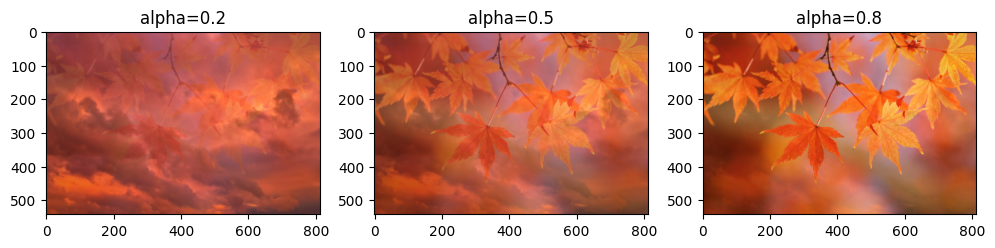

In [139]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('12-13-3.jpg')
image2 = cv2.imread('12-13-4.jpg')

# サイズチェック
print(image1.shape == image2.shape)

# BGR → RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6)) # 横10インチ，縦8インチ

alpha = 0.2
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(131)
plt.title('alpha=0.2')
plt.imshow(blend_image)

alpha = 0.5
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(132)
plt.title('alpha=0.5')
plt.imshow(blend_image)

alpha = 0.8
blend_image = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
plt.subplot(133)
plt.title('alpha=0.8')
plt.imshow(blend_image)

plt.show()

### クロマキー合成の実装
#### 使用画像（https://tinyurl.com/2d6hu7y5 から動画を拝借）
- 入力ファイル1（green_cat.jpg）
<img src="fig/green_cat.jpg" width="25%">

- 入力ファイル2（boston2.jpeg）
<img src="fig/boston2.jpeg" width="25%">

- 以下の順番で作る
- Step1: グリーンバックの切り抜きを作る
    - ```cv2.bitwise_not(入力画像)```を使用することで，黒と白が反転(255 - 画素値)する
        - 黒が白になる
        - 白が黒になる

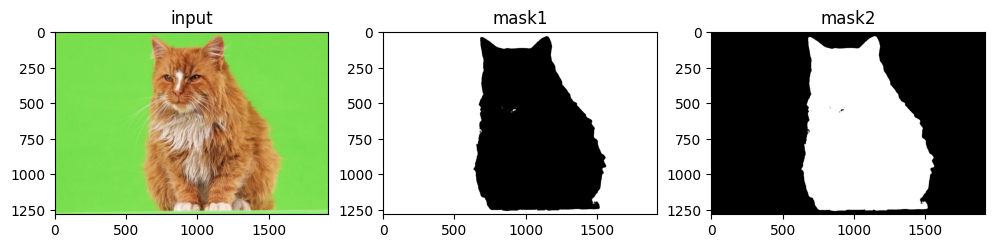

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('green_cat.jpg')

# BGR → HSV
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)

# 緑色を抜き出すマスクを作る（数値は手作業で求める）
min = np.array([20, 50, 50], np.uint8)
max = np.array([80, 255, 255], np.uint8)
mask1 = cv2.inRange(image1, min, max)
mask2 = cv2.bitwise_not(mask1)

plt.figure(figsize=(12, 6)) # 横10インチ，縦8インチ
image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
plt.subplot(131)
plt.title('input')
plt.imshow(image1)

plt.subplot(132)
plt.title('mask1')
plt.imshow(mask1)

plt.subplot(133)
plt.title('mask2')
plt.imshow(mask2)

plt.show()

- Step2: 入力ファイル1とmask2のマスク合成，入力ファイル2とmask1のマスク合成を行う

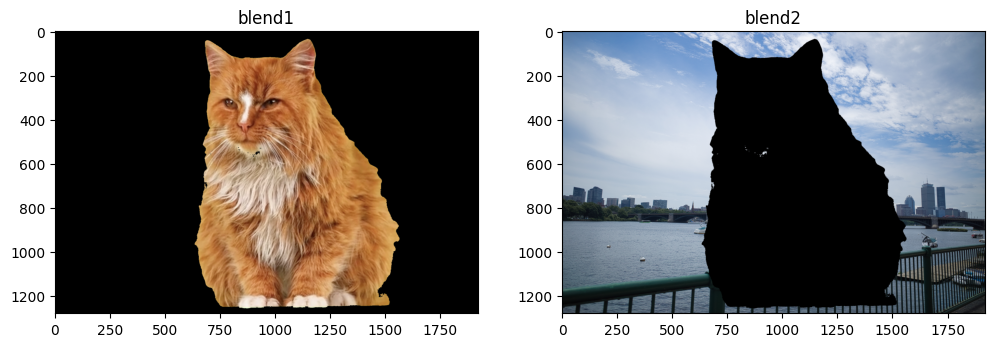

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('green_cat.jpg')
image2 = cv2.imread('boston2.jpeg')

# BGR → HSV
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
# BGR → RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# 緑色を抜き出すマスクを作る（数値は手作業で求める）
min = np.array([20, 50, 50], np.uint8)
max = np.array([80, 255, 255], np.uint8)
mask1 = cv2.inRange(image1, min, max)
mask2 = cv2.bitwise_not(mask1)

# HSVをRGBに戻す処理を行う
image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)

# マスク処理を行う
after_image1 = cv2.bitwise_and(image1, image1, mask=mask2)
after_image2 = cv2.bitwise_and(image2, image2, mask=mask1)

plt.figure(figsize=(12, 6)) # 横10インチ，縦8インチ
plt.subplot(121)
plt.title('blend1')
plt.imshow(after_image1)

plt.subplot(122)
plt.title('blend2')
plt.imshow(after_image2)

plt.show()

- Step3: 2つのマスク合成画像を組み合わせる
```python
クロマキー合成変数 = マスク合成画像1変数 + マスク合成画像2変数
```
- まとめると以下のプログラムになる


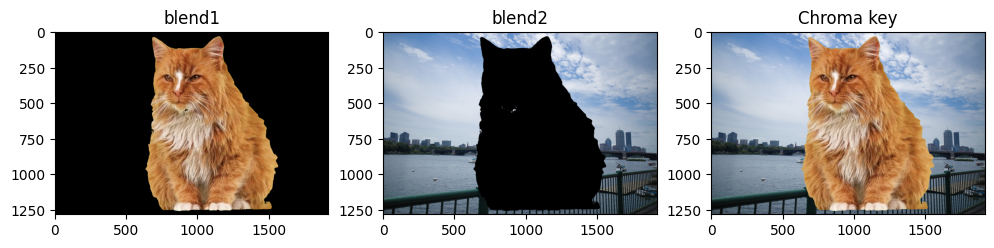

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('green_cat.jpg')
image2 = cv2.imread('boston2.jpeg')

# BGR → HSV
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
# BGR → RGB
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# 緑色を抜き出すマスクを作る（数値は手作業で求める）
min = np.array([20, 50, 50], np.uint8)
max = np.array([80, 255, 255], np.uint8)
mask1 = cv2.inRange(image1, min, max)
mask2 = cv2.bitwise_not(mask1)

# HSVをRGBに戻す処理を行う
image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)

# マスク処理を行う
after_image1 = cv2.bitwise_and(image1, image1, mask=mask2)
after_image2 = cv2.bitwise_and(image2, image2, mask=mask1)

# クロマキー合成を作る
after_image3 = after_image1 + after_image2

plt.figure(figsize=(12, 6)) # 横10インチ，縦8インチ
plt.subplot(131)
plt.title('blend1')
plt.imshow(after_image1)

plt.subplot(132)
plt.title('blend2')
plt.imshow(after_image2)

plt.subplot(133)
plt.title('Chroma key')
plt.imshow(after_image3)

plt.show()

### 演習
1. 以下の透過画像(12-13-ex1.png)における，R要素値，G要素値，B要素値，透過度のヒストグラムを作成しなさい
<img src="fig/12-13-ex1.png" width="33%">

2. 以下の画像2つに対して，アルファブレンディングを行いなさい（ただし，αの値が0.1, 0.3, 0.5, 0.7, 0.9の5種類の結果を1列に表示すること）

- 入力画像1: 12-13-ex2a.jpg
<img src="fig/12-13-ex2a.jpg" width="33%">

- 入力画像2: 12-13-ex2b.jpg
<img src="fig/12-13-ex2b.jpg" width="33%">

3. 以下の画像2つに対して，クロマキー合成を行いなさい（ただし，12-13-ex3a.jpgの人物の画素値を，12-13-ex3b.jpgの空に合成すること）

- 入力画像1: 12-13-ex3a.jpg
<img src="fig/12-13-ex3a.jpg" width="33%">

- 入力画像2: 12-13-ex3b.jpg
<img src="fig/12-13-ex3b.jpg" width="33%">
